In [1]:
import matplotlib 

In [1]:
import random
Liaisons=[[0,1,0,1,0],[1,0,0,1,1],[1,0,0,1,1],[1,1,0,0,1],[0,1,1,0,0]]
info=[1,0,0,0,0]  #personnes qui vont transmettre l'information
stock_info=[1,0,0,0,0]  #nombres de fois que chaque personne à recu l'info
nbr=1 #nbr de personnes totales à avoir eu l'information
probas={"Recevoir":0.8,"Envoyer":0.5}


def passage_info_simple(liaisons,info,stock_info,nbr):
    """list[list[int]]*list[int]*list[int]*int->list[int]
    Transmet l'information à la géneration suivante"""
    new_info=[0 for i in info]
    new_stock_info=[i for i in stock_info]
    for i in range(len(info)):
        if info[i]==1:
            for a in range(len(liaisons[i])):
                rdm=random.random()
                if liaisons[i][a]==1 and rdm<probas["Envoyer"]: #a modifier pour modèle complexe
                    if new_stock_info[a]<1 and rdm<probas["Recevoir"]: #a modifier pour modèle complexe
                        new_info[a]=1
                        nbr+=1
                        new_stock_info[a]+=1
                    elif rdm<probas["Recevoir"]:
                        new_stock_info[a]+=1
                
    return new_info,new_stock_info,nbr

print(passage_info_simple(Liaisons,info,stock_info,nbr))

def test_probas(n):
    compte=0
    for i in range(n):
        if passage_info_simple(Liaisons,info,stock_info,nbr)[2] == 2:
            compte +=1
    return compte/n
print(test_probas(100000))

def transfert_n_generations(liaisons,info,stock_info,nbr,n):
    """list[list[int]]*list[int]*list[int]*int*int->list[int]
    transmet l'informations n fois, retourne info,stock_info et nbr chaque étape"""
    Ltemp=[i for i in info]
    stocktemp=[i for i in stock_info]
    nbrtemp=nbr
    for i in range(n):
        temp=passage_info_simple(liaisons,Ltemp,stocktemp,nbrtemp)
        Ltemp=[i for i in temp[0]]
        stocktemp=[i for i in temp[1]]
        nbrtemp=temp[2]
        print(Ltemp,stocktemp,nbrtemp)
        if nbrtemp==len(liaisons): 
            return "Information diffusée !"
        
    return Ltemp
print(transfert_n_generations(Liaisons,info,stock_info,nbr,5))        



([0, 1, 0, 0, 0], [1, 1, 0, 0, 0], 2)
0.49993
[0, 0, 0, 1, 0] [1, 0, 0, 1, 0] 2
[0, 0, 0, 0, 0] [1, 0, 0, 1, 0] 2
[0, 0, 0, 0, 0] [1, 0, 0, 1, 0] 2
[0, 0, 0, 0, 0] [1, 0, 0, 1, 0] 2
[0, 0, 0, 0, 0] [1, 0, 0, 1, 0] 2
[0, 0, 0, 0, 0]


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.random_geometric_graph(10,0.56)
#plt.subplot(121)
nx.draw(G)
nodes=G.nodes(data=True)


In [3]:

H=nx.path_graph(10)
G=nx.Graph()
G.add_nodes_from([i for i in range(10)])
G.add_edge(0,1)
G.add_edge(1,0)



In [4]:
Liaisons=[[0,1,0,0,0],[1,0,0,1,1],[1,1,0,1,1],[1,1,0,0,1],[0,1,1,0,0]]

def draw_liaisons(l):
    """list[list[int]]->NoneType
    renvoi le dessin des liaisons à partir de la matrice liaisons"""
    G=nx.Graph()
    i=len(l)
    G.add_nodes_from([elt for elt in range(i)])
    for elt in range(len(l)):
        for elt2 in range(len(l[elt])):
            if l[elt][elt2]==1:
                G.add_edge(elt,elt2)
    return nx.draw(G,with_labels=True)
    

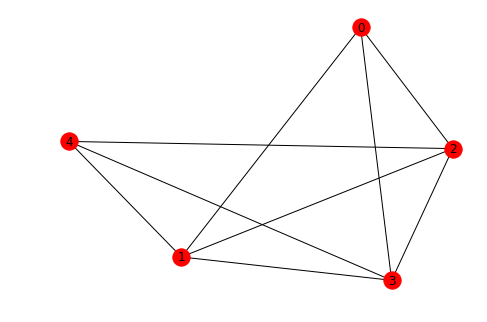

In [5]:
draw_liaisons(Liaisons)

In [36]:
import math
def nbr_amis(personne):
    """list[int]->int
    renvoie le nombre d'amis d'une personne à partir d'une liste de 0 et de 1"""
    nbr=0
    for elt in range(len(personne)):
        if elt==1:
            nbr+=1
    return nbr

def choisir_amis(no_personne,n,nbr_moy):
    """int*int->list[int]
    renvoie les une liste avec les amis choisis d'une personne"""
    LR=[]
    exclusion= [i for i in range(n) if i!=no_personne]
    last=0
    for elt in range(nbr_moy):
        last=random.choice(exclusion)
        LR.append(last)
        exclusion.remove(last)
    return LR
        
        
def simple_graph_generator(n):
    """int->list[list[int]]
    Genere un réseaux d'amis aléatoire avec n le nombre de personnes"""
    LR=[[0 for elt in range(n)] for i in range(n)]
    nbr_moy=int(math.log(n)*(1+n*14/300000000)) #Trouver la bonne fonction
    for elt in range(n):
        amis=choisir_amis(elt,n,nbr_moy)
        for elt2 in amis:
            tolerance=round(n*2/13)
            if nbr_amis(LR[elt]) <= nbr_moy+tolerance and nbr_amis(LR[elt2]) <= nbr_moy+tolerance:
                LR[elt][elt2]=1
                LR[elt2][elt]=1
    return LR
            
            
def donneur_info(population,donneur):
    """int*int->list[int]+list[int]
    donne les matrices info et stock_info"""
    info=[0 if i!= donneur else 1 for i in range(population)]
    return info


graph=simple_graph_generator(180)
info=[i for i in donneur_info(180,7)]
print(transfert_n_generations(graph,info,info,1,10))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

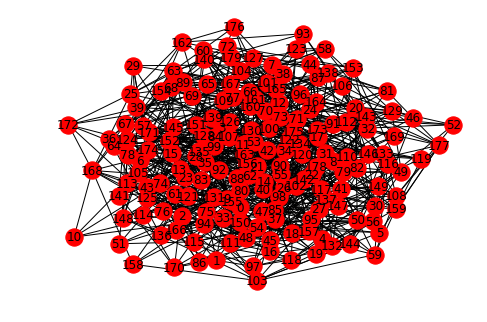

In [7]:
draw_liaisons(simple_graph_generator(180))


[[0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [8]:
random.choice([1,2,3,4,5,6])

6

In [9]:
liste=[1,2,3,4,5]
liste.remove(1)
liste

[2, 3, 4, 5]

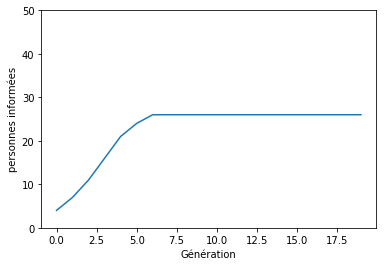

In [25]:
probas={"Recevoir":0.5,"Envoyer":0.3}
def nbr_evolution(liaisons,info,stock_info,nbr,n):
    """list[list[int]]*list[int]*list[int]*int*int->int
   renvoie la liste du nombre de personnes ayant l'information à chaque géneration"""
    Ltemp=[i for i in info]
    stocktemp=[i for i in stock_info]
    nbrtemp=nbr
    NBR=[]
    for i in range(n):
        temp=passage_info_simple(liaisons,Ltemp,stocktemp,nbrtemp)
        Ltemp=[i for i in temp[0]]
        stocktemp=[i for i in temp[1]]
        nbrtemp=temp[2]
        NBR.append(nbrtemp)
    return NBR

def plot_information(L,taille):
    '''
    list[int]-> None
    Visualise l'évolution du opartage de l'information au cours du temps
    '''
    plt.figure()
    plt.plot(L)
    plt.ylim(0,taille)
    plt.ylabel("personnes informées")
    plt.xlabel("Génération")
    plt.show()
    return
generate=simple_graph_generator(50)
donneur=donneur_info(50,27)
stock=[i for i in donneur]
listevo=nbr_evolution(generate,donneur,stock,1,20)
plot_information(listevo,50)

In [44]:
a=3
a-=1
a

2

In [49]:
Profiltypes= {"classique":0.4,"marginal":0.3,"vieux":0.1,"geek":0.2}
def listprofil(probaprofil,n):
    """dict[str:int]*int->list[str]
    renvoie une liste de n personnes avec leur profil"""
    LR=[]
    nbr={"classique":round(n*probaprofil["classique"]),
         "marginal":round(n*probaprofil["marginal"]),
        "vieux":round(n*probaprofil["vieux"]),
        "geek":round(n*probaprofil["geek"])}
    nbr=[]
    for i in probaprofil.keys():
        nbr=nbr+[n for n in range(round(n*probaprofil[i]))]
    for i in range(n):
        LR.append(random.choice(nbr))

    return LR
listprofil(Profiltypes,20)       
        

[0, 1, 1, 5, 3, 2, 0, 3, 5, 3, 2, 0, 0, 3, 3, 5, 5, 6, 2, 0]